# 项目：分析鸢尾花种类数据

## 分析目标

此数据分析报告的目的是基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异，让我们可以对不同种类鸢尾花的属性特征进行推断。

## 简介

原始数据`Iris.csv`包括两种鸢尾花，每种有 50 个样本，以及每个样本的一些属性，包括萼片的长度和宽度、花瓣的长度和宽度。

`Iris.csv`每列的含义如下：
- Id：样本的ID。
- SepalLengthCm：萼片的长度（单位为厘米）。
- SepalWidthCm：萼片的宽度（单位为厘米）。
- PetalLengthCm：花瓣的长度（单位为厘米）。
- PetalWidthCm：花瓣的宽度（单位为厘米）。
- Species：鸢尾花种类。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind 

## 读取数据

In [3]:
original_data = pd.read_csv("Iris (1).csv")
original_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


## 评估和清理数据

##### 数据整齐度：每列一个变量，每行一个观察值，每种类型的观察数据为一个表格
##### 数据干净度：丢失数据，重复数据，无效数据，数据类型错误，不一致数据

In [5]:
cleaned_data = original_data.copy()

### 数据整齐度

数据符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”，因此不存在结构性问题。

### 数据干净度

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   SepalLengthCm  100 non-null    float64
 2   SepalWidthCm   100 non-null    float64
 3   PetalLengthCm  100 non-null    float64
 4   PetalWidthCm   100 non-null    float64
 5   Species        100 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 4.8+ KB


无缺失数据，id应为字符串类型，Species应为category类型

In [7]:
cleaned_data["Id"] = cleaned_data["Id"].astype(str)
cleaned_data["Id"]

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: Id, Length: 100, dtype: object

In [9]:
cleaned_data["Species"] = cleaned_data["Species"].astype("category")
cleaned_data["Species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: Species, Length: 100, dtype: category
Categories (2, object): ['Iris-setosa', 'Iris-versicolor']

#### 处理重复数据

In [10]:
cleaned_data.duplicated().sum()

np.int64(0)

无重复数据

#### 处理重复数据或无效数据

In [11]:
cleaned_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.094000,2.862000,0.785000
std,0.641698,0.476057,1.448565,0.566288
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


cleaned_data里不存在脱离现实意义的数值。

#### 处理不一致数据

不一致数据可能出现在Species里

In [12]:
cleaned_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

不存在不一致数据

## 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，基于鸢尾花的属性数据，分析两种鸢尾花萼片、花瓣的长度和宽度平均值，是否存在显著性差异。

那么我们可以对数据基于Species列，先把各个鸢尾花种类样本数据筛选出来。

In [14]:
cleaned_data_Iris_setosa = cleaned_data.query('Species == "Iris-setosa"')
cleaned_data_Iris_setosa

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [15]:
cleaned_data_Iris_versicolor = cleaned_data.query('Species == "Iris-versicolor"')
cleaned_data_Iris_versicolor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


## 探索数据

借助数据可视化，探索Setosa和Versicolor这两种鸢尾花的变量特点。

可视化探索可以帮我们对数据有一个更直观的理解，比如了解数据的分布、发现变量之间的关系，等等，从而为后续的进一步分析提供方向。

针对数值，我们可以直接绘制成对图，利用其中的密度图查看不同变量的分布，以及利用散点图了解变量之间的关系。

并且，由于此次分析目的是了解不同种类鸢尾花的属性特征是否存在差异，我们可以利用颜色对图表上不种类类的样本进行分类。

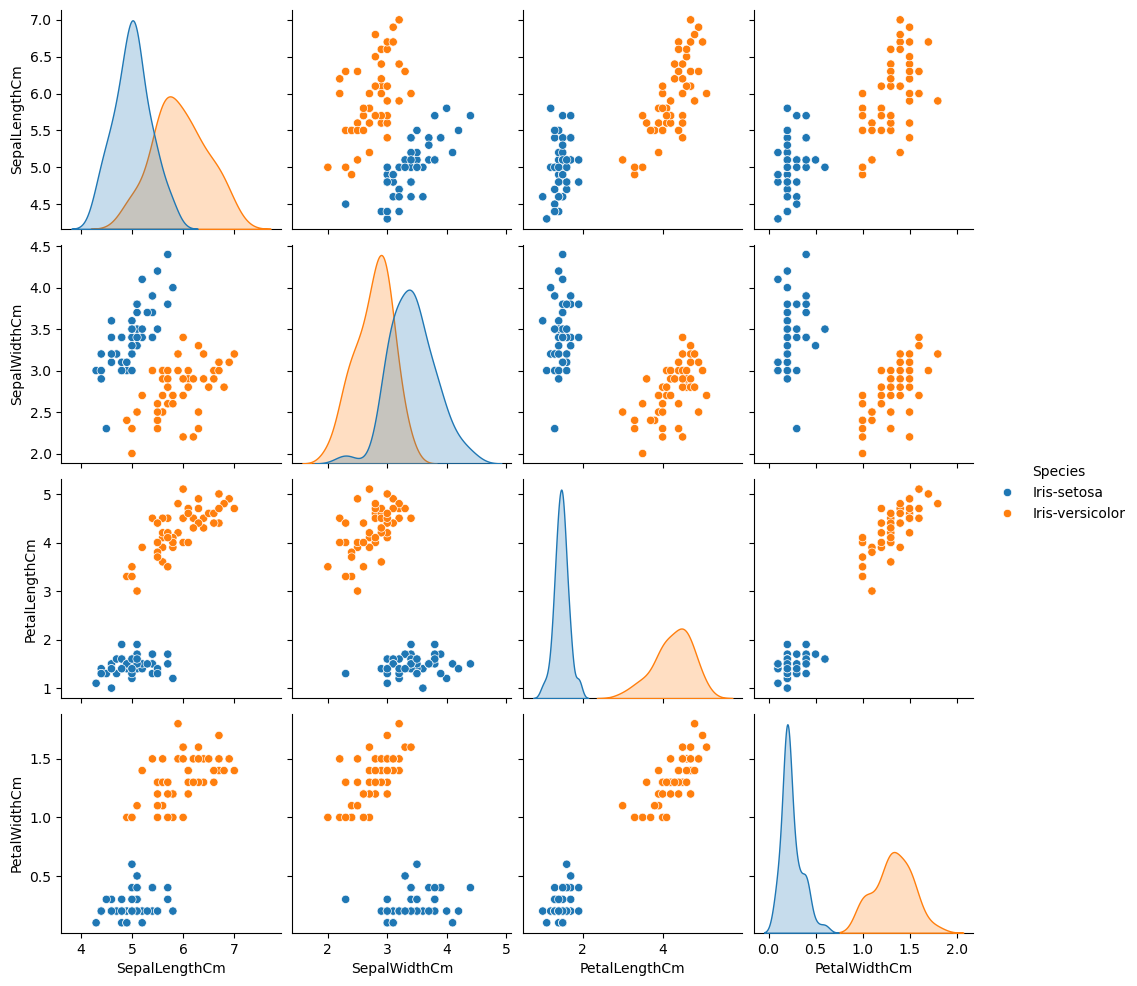

In [17]:
sns.pairplot(cleaned_data,hue = "Species")

Setosa和Versicolor样本的花瓣长度以及花瓣宽度的分布存在明显数值上的不同，已经可以猜测假设检验的结果是，两种鸢尾花的花瓣长度与宽度有统计显著性差异。

萼片的长度和宽度在分布上存在重叠，暂时无法仅通过图表下结论，需要进行假设检验，来推断总体的萼片长度和宽度之间是否有差异。

## 数据分析

利用假设检验，依次检验Setosa和Versicolor这两种鸢尾花在萼片、花瓣的长度和宽度平均值方面，是否存在统计显著性差异。

不知道总体方差，而且z检验适合样本容量大的时候，所以用t检验

t检验的要求：样本为随机抽样，总体呈正态分布

### 分析萼片长度

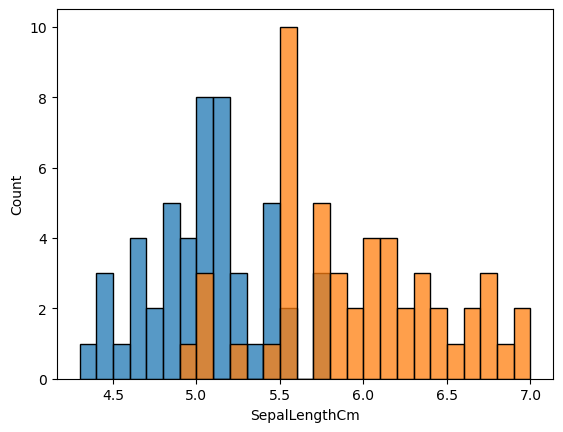

In [20]:
sns.histplot(cleaned_data_Iris_setosa["SepalLengthCm"],binwidth=0.1)
sns.histplot(cleaned_data_Iris_versicolor["SepalLengthCm"],binwidth=0.1)
plt.show()

#### 建立假设

$H_0$(原假设)：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值不存在显著区别。

$H_1$(备择假设)：Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

#### 确认检验是单尾还是双尾

双尾检验

#### 确定显著水平

显著水平越越严格，越大越宽松

In [21]:
alpha = 0.05

#### 计算t值和p值

In [22]:
t,p = ttest_ind(cleaned_data_Iris_setosa["SepalLengthCm"],cleaned_data_Iris_versicolor["SepalLengthCm"])
print(t,p)

-10.52098626754911 8.985235037487079e-18


#### 结论

由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片长度的平均值存在显著区别。

### 分析萼片长度

In [23]:
t,p = ttest_ind(cleaned_data_Iris_setosa["SepalWidthCm"],cleaned_data_Iris_versicolor["SepalWidthCm"])
print(t,p)

9.282772555558111 4.362239016010214e-15


由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花萼片宽度的平均值存在显著区别。

### 分析花瓣长度

In [24]:
t,p = ttest_ind(cleaned_data_Iris_setosa["PetalLengthCm"],cleaned_data_Iris_versicolor["PetalLengthCm"])
print(t,p)

-39.46866259397272 5.717463758170621e-62


由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣长度的平均值存在显著区别。

### 分析花瓣宽度

In [25]:
t,p = ttest_ind(cleaned_data_Iris_setosa["PetalWidthCm"],cleaned_data_Iris_versicolor["PetalWidthCm"])
print(t,p)

-34.01237858829048 4.589080615710866e-56


由于p值小于显著水平0.05，我们因此拒绝原假设，说明Setosa鸢尾花和Versicolor鸢尾花花瓣宽度的平均值存在显著区别。

## 结论

通过推论统计学的计算过程，我们发现，Setosa鸢尾花和Versicolor鸢尾花萼片、花瓣的长度和宽度平均值，均存在具有统计显著性的差异。